In [103]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
%config InlineBackend.figure_format = 'retina'

Выберите произвольную непрерывную унимодальную заданную на отрезке $[a, b]$ функцию, постройте её график

$f(x) = $

In [104]:
def f(x):
    return x**2 + np.cos(x)
a = -5
b = 5.0

Напишите функции, реализующие одномерный поиск методами дихотомии и золотого сечения

In [121]:
def dich(f, *args):
    a = args[0] ; b = args[1] ; eps = args[2]
    c = ( a + b )/2
    F = f(c)
    count  = 0

    while b - a > eps :
        count = count + 1  
        y = (a+c)/2
        if f(y) <= F:
            b = c
            c = y 
        else : 
            z = (b+c)/2
            if F <= f(z):
                a = y
                b = z 
            else : 
                a = c
                c = z
    return ((a + b)/2 , count )

print(dich(lambda x : (x)**4,a,b,0.001))


Z = (np.sqrt(5) + 1 )/2
def y(a,b):
    return a + (b-a)/Z/Z
def z(a,b):
    return a + (b-a)/Z
def gold(f, *args):
    a = args[0] ; b = args[1] ; eps = args[2]
    y_1 = y(a,b)
    z_1 = z(a,b)
    F_1 = f(y_1)
    F_2 = f(z_1)
    count  = 0 
    while b-a > eps :
        count = count + 1 
        if F_1 <= F_2 :
            b = z_1
            z_1 = y_1 ; F_2 = F_1
            y_1 = y(a,b) ; F_1 = f(y_1)
        else : 
            a = y_1 
            y_1 = z_1 ; F_1 = F_2
            z_1 = z(a,b) ; F_2 =f(z_1)
    return ((a + b)/2 , count)

print(gold(lambda x : x**2 + np.exp(x),a,b,0.001))


(0.0, 14)
(-0.3516236587831876, 20)


print(dich(f,a,b,0.15))
Найдите минимум функции $f$ с помощью методов одномерного поиска, отметьте найденное решение на графике функции

In [106]:
# code
print(dich(f,a,b,0.15))
print(gold(f,a,b,0.15))

(0.0, 7)
(-4.996003610813204e-16, 9)


Для обоих методов постройте графики зависимости количества вычислений функции от требуемой точности.

Оформляйте графики так, чтобы было понятно, что на них изображено: подписывайте оси, при необходимости добавляйте заглавие (`plt.title()`) и легенду (`plt.legend()`). Графики могут получиться более информативными, если использовать логарифмический масштаб

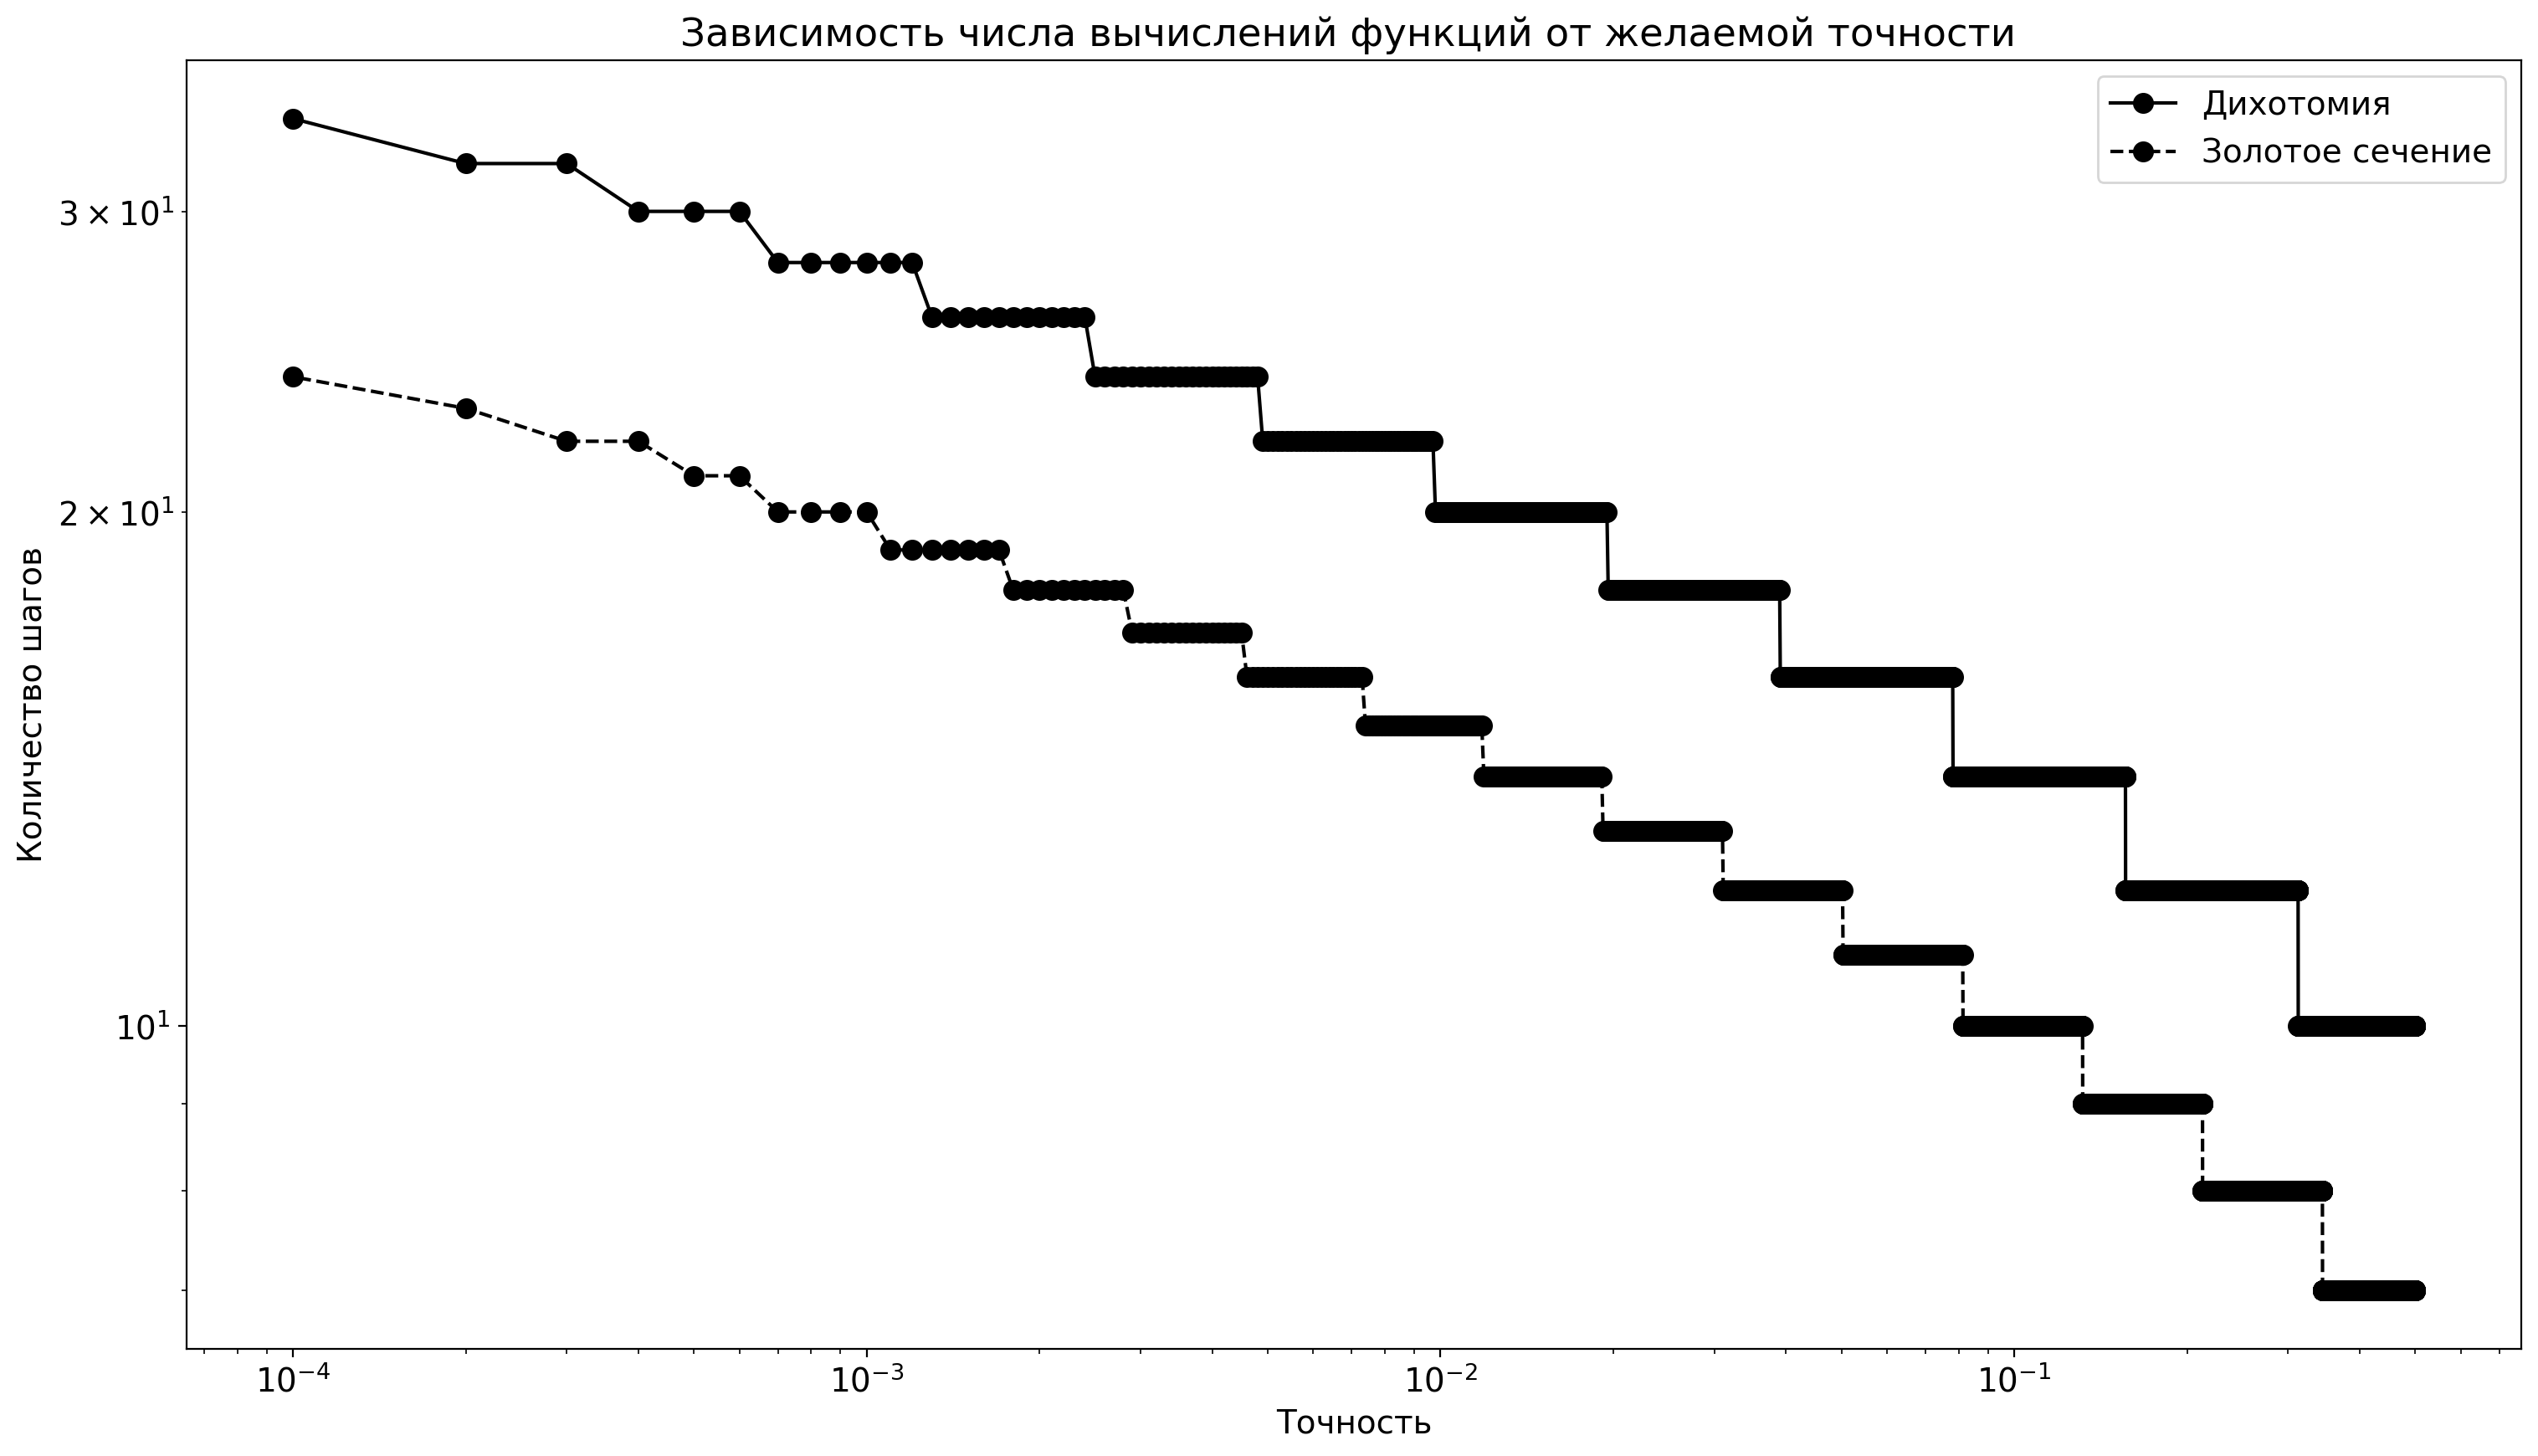

In [145]:
epsmass = np.arange(0.5,0.0, -0.0001)
# epsmass = [10**x for x in range(-1,-10 ,-1) ]
dich_y = []
gold_y = []
for i in epsmass :
    dich_y.append(2*dich(f,a,b,i)[1])
    gold_y.append(gold(f,a,b,i)[1])

plt.figure(figsize=(18, 10))
plt.loglog(epsmass , dich_y , 'k.-', ms=16, label='Дихотомия')
plt.loglog(epsmass , gold_y , 'k.--', ms=16, label='Золотое сечение')

plt.title(u"Зависимость числа вычислений функций от желаемой точности ")
plt.xlabel(u"Точность")
plt.ylabel(u"Количество шагов")
plt.legend()
plt.show()

Каковы теоретические гарантии на скорость сходимости этих методов? Во всех ли случаях метод с лучшей оценкой на скорость сходимости / сложность сходится быстрее? 

1) N = log2((b-a)/eps) -1 необходимое число иттераций чтобы достичь точности eps
2) N = ln((b-a)/eps)/lnZ +1 


Воспользуйтесь [методом](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)  одномерной минимизации из библиотеки `scipy`. Для этого метода тоже постройте график количества вызовов функции от точности. Разместите его на одной оси с графиками, построенными выше.

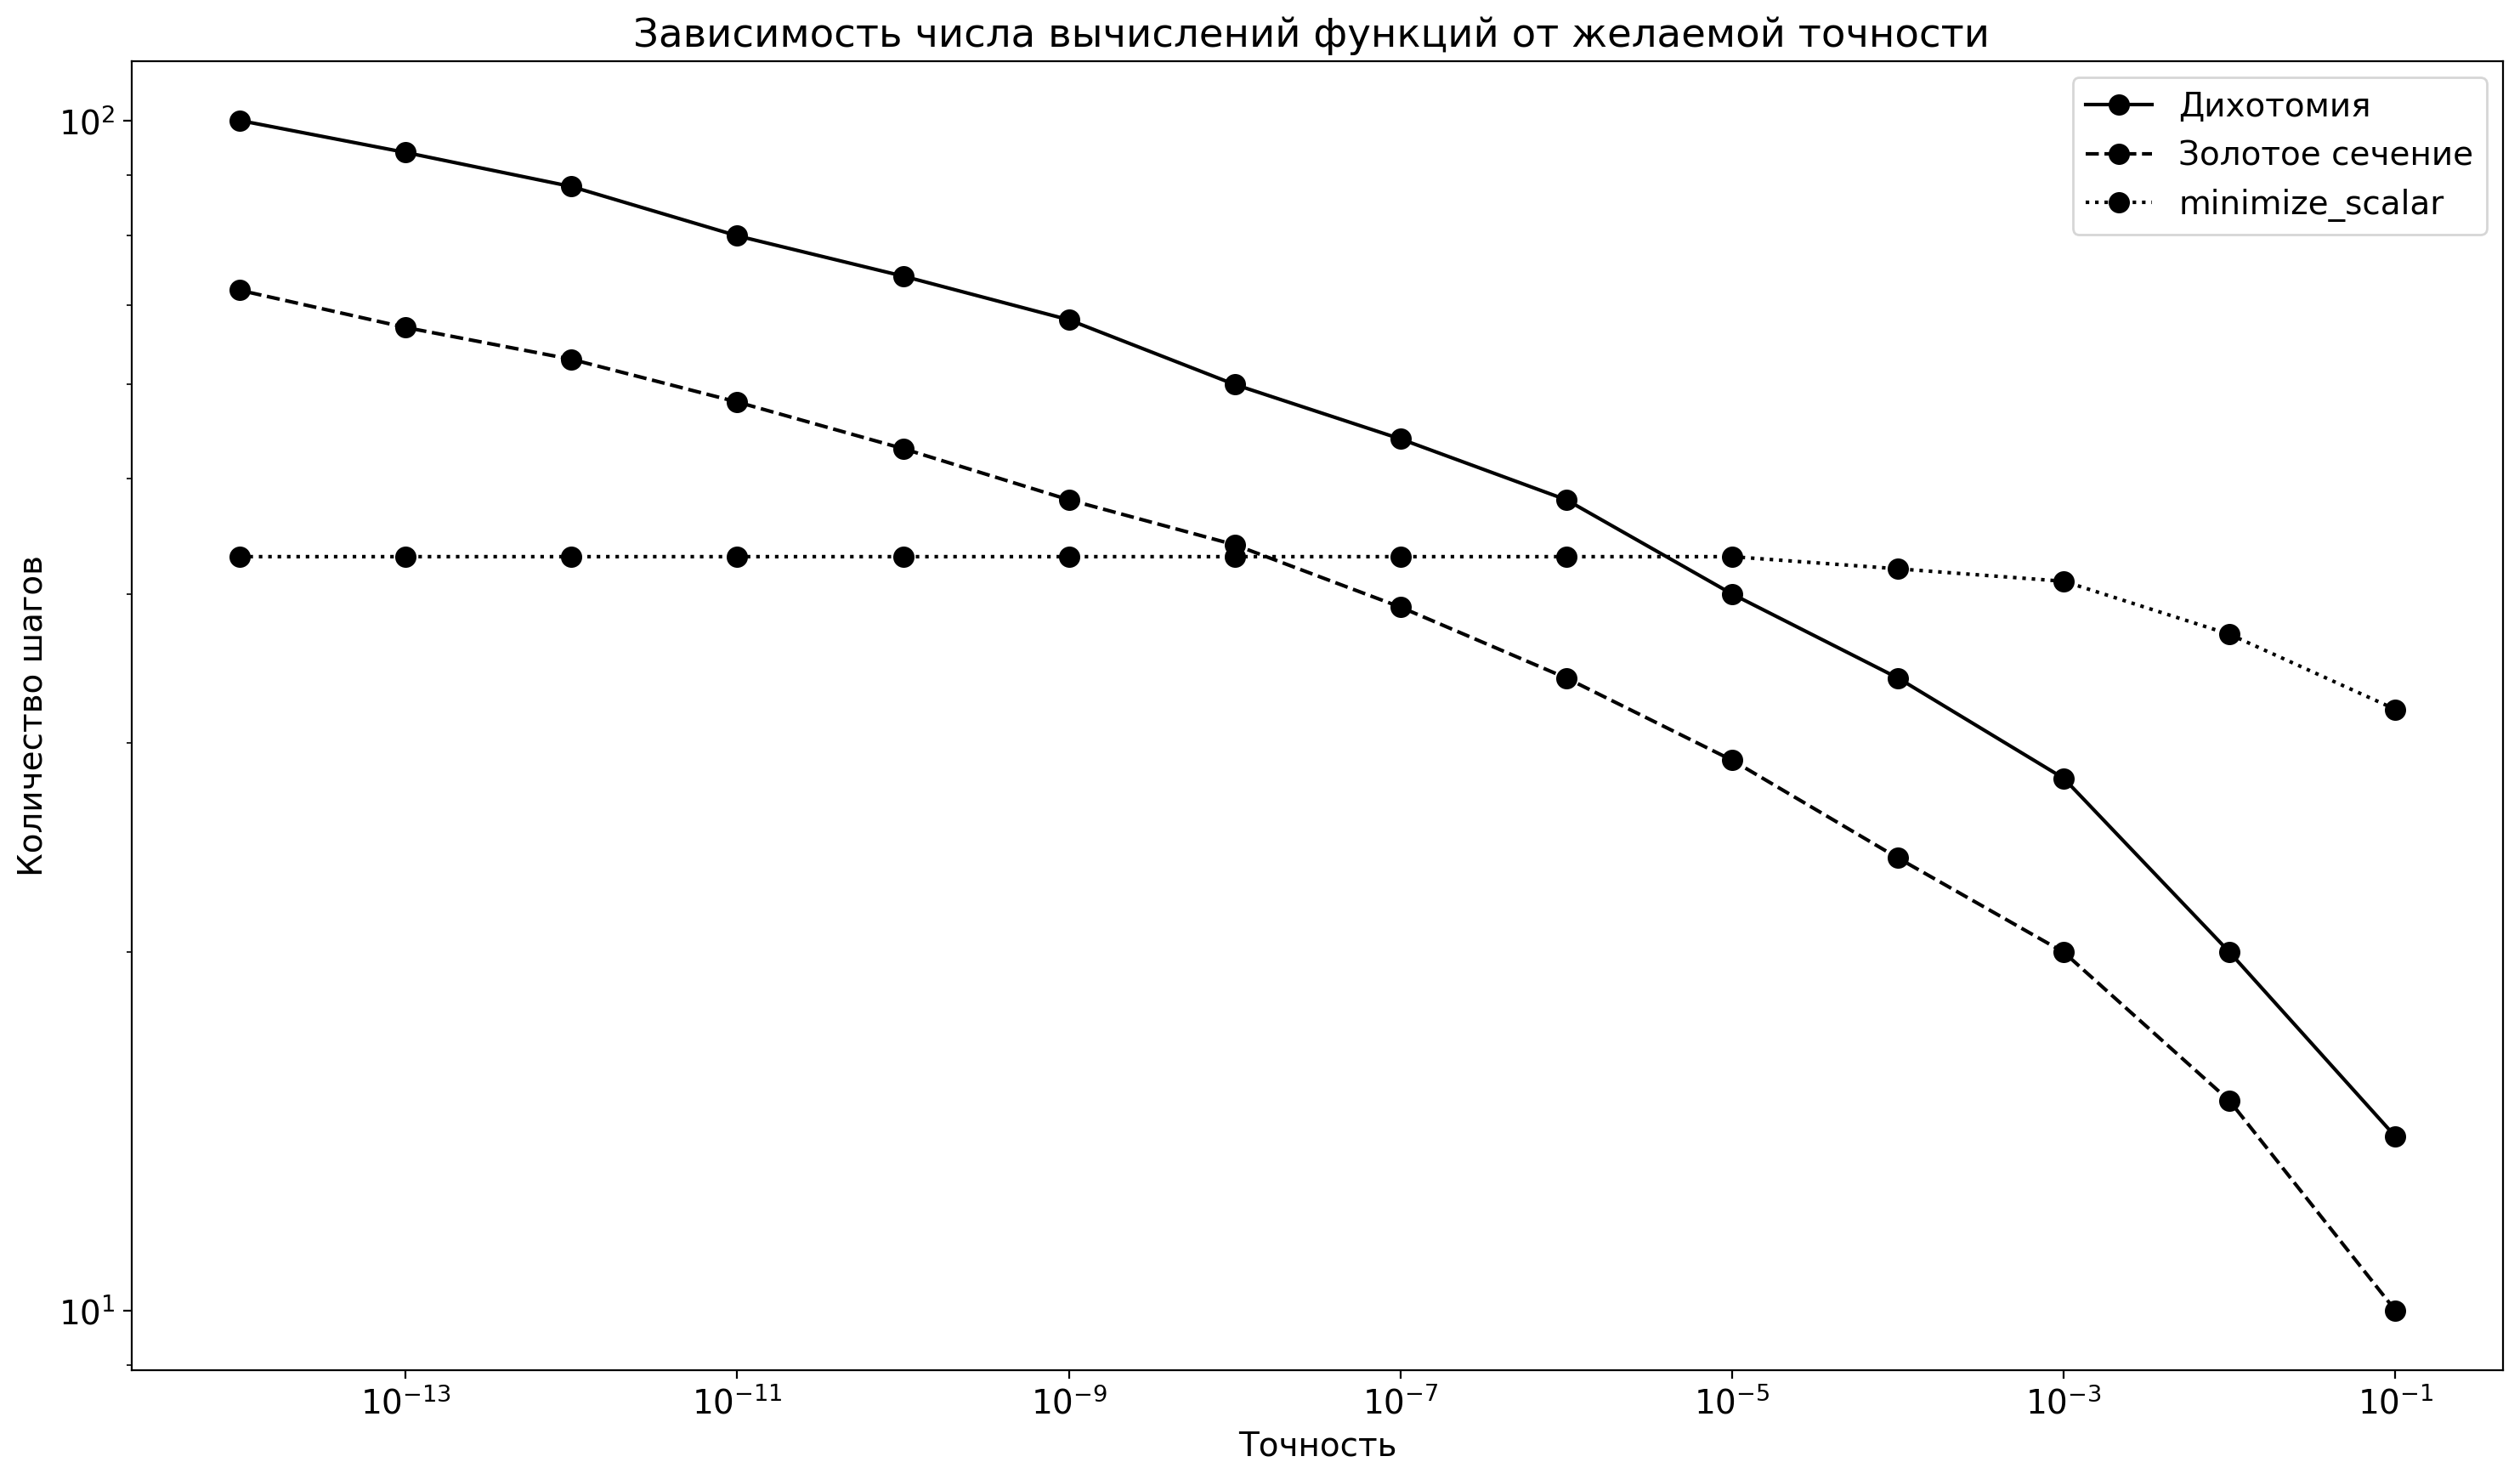

In [139]:
from scipy.optimize import minimize_scalar


epsmass = [10**x for x in range(-1,-15 ,-1) ]
dich_y = []
gold_y = []
res = []
for i in epsmass :
    dich_y.append(2*dich(f,a,b,i)[1])
    gold_y.append(gold(f,a,b,i)[1])
    result = minimize_scalar(f,tol = i)
    res.append(int(result["nfev"]))

plt.figure(figsize=(18, 10))
plt.loglog(epsmass , dich_y , 'k.-', ms=16, label='Дихотомия')
plt.loglog(epsmass , gold_y , 'k.--', ms=16, label='Золотое сечение')
plt.loglog(epsmass , res , 'k.:', ms=16, label='minimize_scalar')

plt.title(u"Зависимость числа вычислений функций от желаемой точности ")
plt.xlabel(u"Точность")
plt.ylabel(u"Количество шагов")
plt.legend()
plt.show()



